In [66]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [67]:
import pandas as pd
import os

#reading the data file, assigning the column headers as they are missing and printing 10 random rows
df = pd.read_csv("glass.data.csv", names = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"])
print (df.sample(n=10))

      Id       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
17    18  1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.00  0.00     1
20    21  1.51750  12.82  3.55  1.49  72.75  0.54  8.52  0.00  0.19     1
185  186  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00     7
93    94  1.51590  13.24  3.34  1.47  73.10  0.39  8.22  0.00  0.00     2
201  202  1.51653  11.95  0.00  1.19  75.18  2.70  8.93  0.00  0.00     7
162  163  1.52211  14.19  3.78  0.91  71.36  0.23  9.14  0.00  0.37     3
38    39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.00  0.00     1
163  164  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.00     5
94    95  1.51629  12.71  3.33  1.49  73.28  0.67  8.24  0.00  0.00     2
157  158  1.52121  14.03  3.76  0.58  71.79  0.11  9.65  0.00  0.00     3


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [68]:
#finding the null values
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No missing values in this dataset

## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


In [69]:
import matplotlib.pyplot as plt
import numpy as np

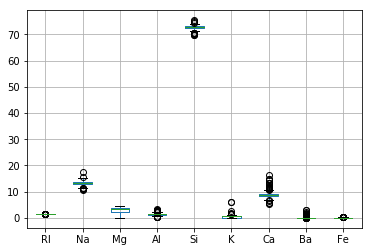

In [70]:
#Boxplot for all columns except Id and Type
df.boxplot(["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"])

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [71]:
#Variance of each column
df.apply("var")

Id      3834.166667
RI         0.000009
Na         0.666841
Mg         2.080540
Al         0.249270
Si         0.599921
K          0.425354
Ca         2.025366
Ba         0.247227
Fe         0.009494
Type       4.425716
dtype: float64

Columns 'RI' and 'Fe' have variances less than 0.1. These columns will be dropped

In [72]:
df2 = df.drop(columns=["RI","Fe"])

In [73]:
df2.head()

,Id,Na,Mg,Al,Si,K,Ca,Ba,Type
0,1,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,2,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,3,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,4,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,5,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

In [74]:
import seaborn as sns

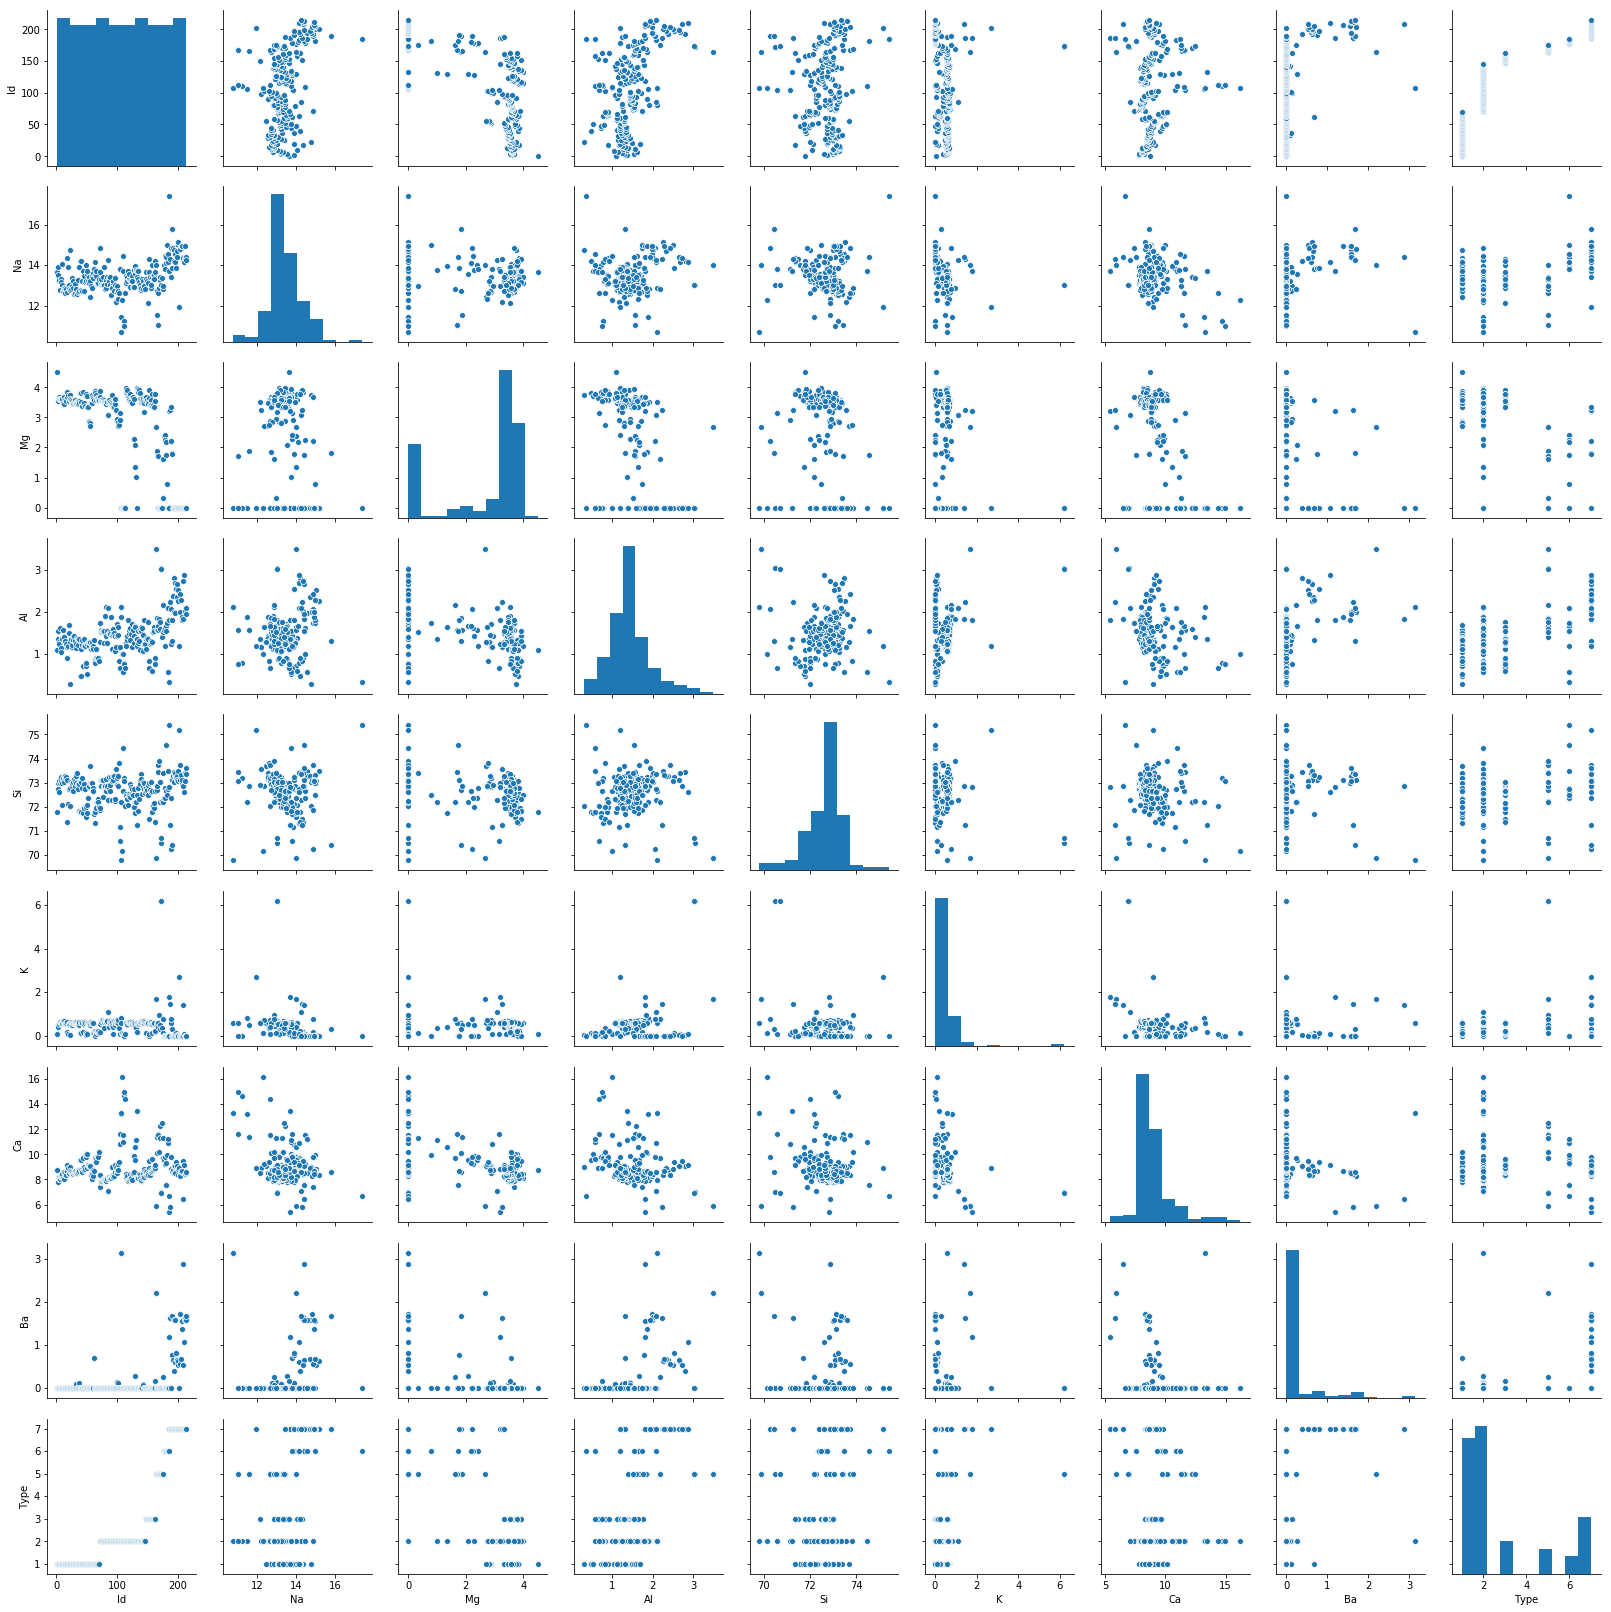

In [75]:
# Analyze the different attributes for distribution and the correlation by using scatter matrix

sns.pairplot(df2)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [76]:
# Create a separate dataframe consisting only of the features i.e independent attributes

feature_df2 = df2.drop(labels= ["Id","Type"] , axis = 1)
feature_df2.head()

,Na,Mg,Al,Si,K,Ca,Ba
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0


In [77]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always advised to scale numeric attributes in models that calculate distances.
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

feature_df2_z = feature_df2.apply(zscore)  # convert all attributes to Z scale 

feature_df2_z.describe()



,Na,Mg,Al,Si,K,Ca,Ba
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01
25%,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01
50%,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01
75%,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01
max,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00


In [78]:
# Capture the Type values from the 'Type' column into a pandas series akin to array 

df2_labels = df2["Type"]

In [79]:
# store the normalized features data into np array 

import numpy as np
X = np.array(feature_df2_z)
X.shape

(214, 7)

In [80]:
# store the df_labels data into a separate np array

y = np.array(df2_labels)
y.shape

(214,)

In [81]:
# Split X and y into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [82]:
#k=3
NNH = KNeighborsClassifier(n_neighbors= 3)

In [83]:
#Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [84]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
score_k3 = NNH.score(X_test, y_test)
score_k3

0.7692307692307693

In [85]:
#k = 6
NNH = KNeighborsClassifier(n_neighbors= 6)
#Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)
# For every test data point, predict it's label based on 6 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
score_k6 = NNH.score(X_test, y_test)
score_k6

0.7076923076923077

In [86]:
#k = 9
NNH = KNeighborsClassifier(n_neighbors= 9)
#Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)
# For every test data point, predict it's label based on 9 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
score_k9 = NNH.score(X_test, y_test)
score_k9

0.7076923076923077

In [87]:
 print ("Score for n=3 is {}, for n=6 is {} and for n=9 is {}".format(score_k3,score_k6,score_k9))

Score for n=3 is 0.7692307692307693, for n=6 is 0.7076923076923077 and for n=9 is 0.7076923076923077


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [1,3,5,7,9,11,13,15,17,19]

In [89]:
#empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
#min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 1


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [90]:
%matplotlib inline 

fig_size = plt.rcParams["figure.figsize"]
fig_size

[6.0, 4.0]

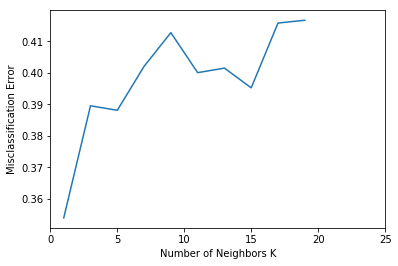

In [91]:
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()